In [2]:
import numpy as np

# Define the point in the world coordinate system (frontal view) with actual values
x_w, y_w, z_w = 1.0, 2.0, 3.0  # Example coordinates in the world coordinate system
point_world = np.array([x_w, y_w, z_w])

# Define the translation vector to move from the world coordinate system to the face coordinate system
tx, ty, tz = 0.5, -1.0, 2.0  # Example translation values
translation_vector = np.array([tx, ty, tz])

# Define the rotation angles (in degrees) for each axis
angle_x, angle_y, angle_z = 30, 45, 60  # Example rotation angles

# Convert angles to radians
theta_x = np.radians(angle_x)
theta_y = np.radians(angle_y)
theta_z = np.radians(angle_z)

# Create rotation matrices for each axis
R_x = np.array([
    [1, 0, 0],
    [0, np.cos(theta_x), -np.sin(theta_x)],
    [0, np.sin(theta_x), np.cos(theta_x)]
])

R_y = np.array([
    [np.cos(theta_y), 0, np.sin(theta_y)],
    [0, 1, 0],
    [-np.sin(theta_y), 0, np.cos(theta_y)]
])

R_z = np.array([
    [np.cos(theta_z), -np.sin(theta_z), 0],
    [np.sin(theta_z), np.cos(theta_z), 0],
    [0, 0, 1]
])

# Combine the rotation matrices (using ZYX order as an example)
R = R_z @ R_y @ R_x

# Transform the point
point_face = R @ (point_world - translation_vector)

print("Coordinates in face coordinate system (lateral view):", point_face)

Coordinates in face coordinate system (lateral view): [-0.8036943   2.80411306  1.31947922]


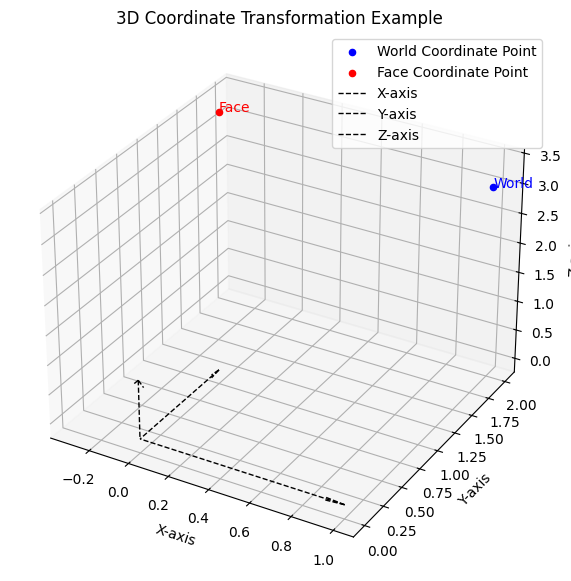

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the point in the world coordinate system (frontal view) with example values
x_w, y_w, z_w = 1.0, 2.0, 3.0  # Point in world coordinates
point_world = np.array([x_w, y_w, z_w])

# Define the translation vector for the face coordinate system
tx, ty, tz = 0.5, -1.0, 2.0  # Translation values
translation_vector = np.array([tx, ty, tz])

# Define rotation angles (in degrees) and convert to radians
angle_x, angle_y, angle_z = 30, 45, 60  # Rotation angles
theta_x = np.radians(angle_x)
theta_y = np.radians(angle_y)
theta_z = np.radians(angle_z)

# Create rotation matrices
R_x = np.array([
    [1, 0, 0],
    [0, np.cos(theta_x), -np.sin(theta_x)],
    [0, np.sin(theta_x), np.cos(theta_x)]
])

R_y = np.array([
    [np.cos(theta_y), 0, np.sin(theta_y)],
    [0, 1, 0],
    [-np.sin(theta_y), 0, np.cos(theta_y)]
])

R_z = np.array([
    [np.cos(theta_z), -np.sin(theta_z), 0],
    [np.sin(theta_z), np.cos(theta_z), 0],
    [0, 0, 1]
])

# Combine rotation matrices (ZYX order)
R = R_z @ R_y @ R_x

# Transform the point
point_face = R @ (point_world - translation_vector)

# Plotting the points in 3D for visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot original world point
ax.scatter(*point_world, color='blue', label='World Coordinate Point')
ax.text(*point_world, 'World', color='blue')

# Plot transformed face point
# Reverse the translation for plotting
transformed_point = point_face + translation_vector
ax.scatter(*transformed_point, color='red', label='Face Coordinate Point')
ax.text(*transformed_point, 'Face', color='red')

# Draw coordinate system lines
ax.quiver(0, 0, 0, 1, 0, 0, color='black', linestyle="--",
          linewidth=1, arrow_length_ratio=0.1, label='X-axis')
ax.quiver(0, 0, 0, 0, 1, 0, color='black', linestyle="--",
          linewidth=1, arrow_length_ratio=0.1, label='Y-axis')
ax.quiver(0, 0, 0, 0, 0, 1, color='black', linestyle="--",
          linewidth=1, arrow_length_ratio=0.1, label='Z-axis')

# Set labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Coordinate Transformation Example")
ax.legend()

plt.show()

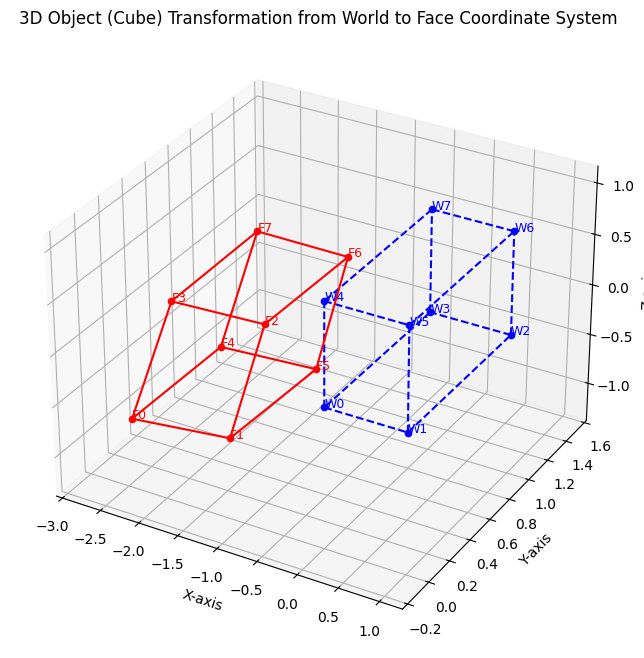

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Let's apply the transformation to an entire object: a simple 3D cube for visualization

# Define vertices of a cube in the world coordinate system
cube_vertices_world = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Apply the translation and rotation to each vertex to transform it to the face coordinate system
cube_vertices_face = np.array(
    [R @ (vertex - translation_vector) for vertex in cube_vertices_world])

# Plot the original cube and the transformed cube
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original cube in world coordinates (in blue)
for i, vertex in enumerate(cube_vertices_world):
    ax.scatter(*vertex, color='blue')
    ax.text(*vertex, f'W{i}', color='blue', fontsize=9)

# Plot transformed cube in face coordinates (in red)
for i, vertex in enumerate(cube_vertices_face):
    ax.scatter(*vertex, color='red')
    ax.text(*vertex, f'F{i}', color='red', fontsize=9)

# Draw edges of the cubes for better visualization
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom square
    (4, 5), (5, 6), (6, 7), (7, 4),  # Top square
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
]

# Plot edges for the original cube in world coordinates (blue)
for edge in edges:
    ax.plot(*zip(*cube_vertices_world[list(edge)]),
            color='blue', linestyle='--')

# Plot edges for the transformed cube in face coordinates (red)
for edge in edges:
    ax.plot(*zip(*cube_vertices_face[list(edge)]), color='red', linestyle='-')

# Set labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title(
    "3D Object (Cube) Transformation from World to Face Coordinate System")

plt.show()

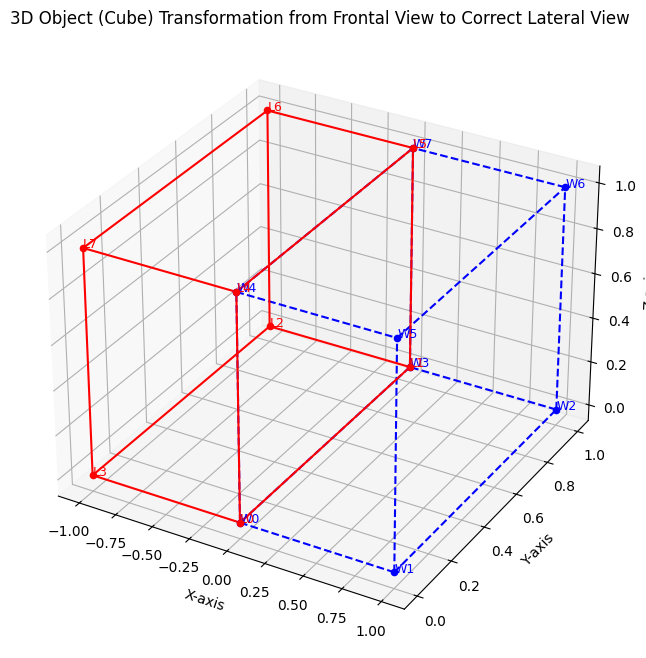

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Modify the rotation to ensure it provides a lateral view by rotating around the Z-axis instead

# Define vertices of a cube in the initial frontal view (world coordinate system)
cube_vertices_world = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# 90-degree rotation around the Z-axis to switch to a lateral view (assuming initial frontal view in XY plane)
theta_z = np.radians(90)  # 90 degrees to radians for lateral view

# Rotation matrix for a 90-degree rotation around the Z-axis
R_z_90 = np.array([
    [np.cos(theta_z), -np.sin(theta_z), 0],
    [np.sin(theta_z), np.cos(theta_z), 0],
    [0, 0, 1]
])

# Apply the rotation to each vertex to get the intended lateral view
cube_vertices_lateral = np.array(
    [R_z_90 @ vertex for vertex in cube_vertices_world])

# Plot the original cube (frontal view) and rotated cube (lateral view)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original cube in world coordinates (frontal view, in blue)
for i, vertex in enumerate(cube_vertices_world):
    ax.scatter(*vertex, color='blue')
    ax.text(*vertex, f'W{i}', color='blue', fontsize=9)

# Plot rotated cube for the lateral view (in red)
for i, vertex in enumerate(cube_vertices_lateral):
    ax.scatter(*vertex, color='red')
    ax.text(*vertex, f'L{i}', color='red', fontsize=9)

# Draw edges of the cubes for better visualization
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom square
    (4, 5), (5, 6), (6, 7), (7, 4),  # Top square
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
]

# Plot edges for the original cube in world coordinates (frontal view)
for edge in edges:
    ax.plot(*zip(*cube_vertices_world[list(edge)]),
            color='blue', linestyle='--')

# Plot edges for the rotated cube in lateral view
for edge in edges:
    ax.plot(
        *zip(*cube_vertices_lateral[list(edge)]), color='red', linestyle='-')

# Set labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title(
    "3D Object (Cube) Transformation from Frontal View to Correct Lateral View")

plt.show()

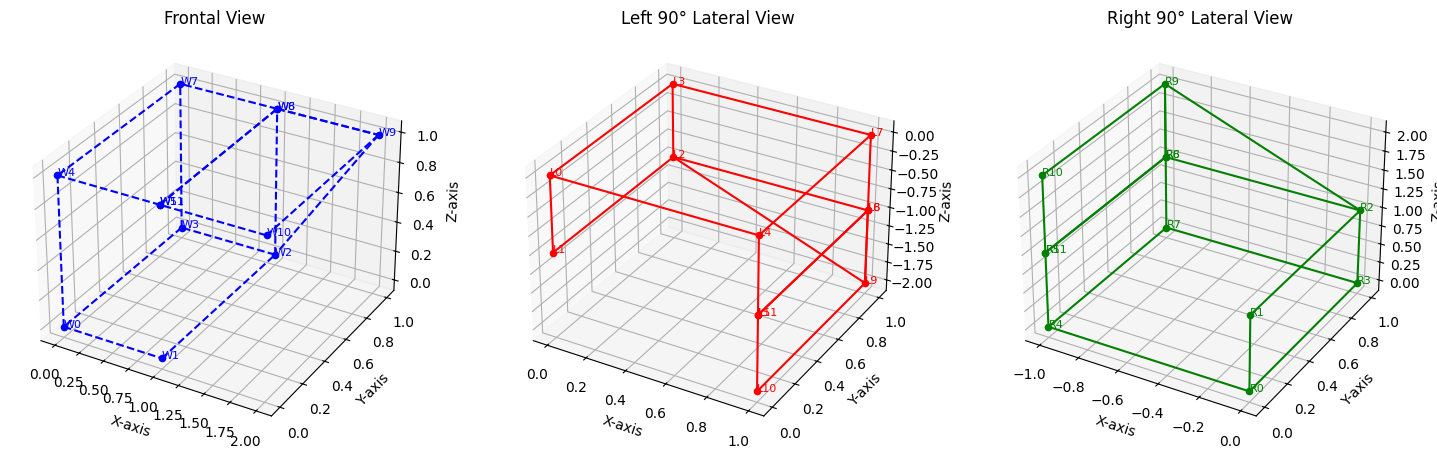

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corrected code for generating the visualization of an L-shaped object with bi-lateral 90° projections

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define vertices of an L-shaped object in the world coordinate system (frontal view)
# This L-shape will be a 3D structure with two segments
l_shape_vertices_world = np.array([
    [0, 0, 0],    # Base corner
    [1, 0, 0],    # Segment along X-axis
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],    # Segment along Z-axis
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
    [1, 1, 1],    # Top part of the "L" (extending in Z)
    [2, 1, 1],
    [2, 0, 1],
    [1, 0, 1]
])

# 90-degree rotations for left and right lateral views around the Y-axis
theta_y_left = np.radians(90)   # Left view (90 degrees)
theta_y_right = np.radians(-90)  # Right view (-90 degrees)

# Rotation matrices for left and right views around the Y-axis
R_y_left = np.array([
    [np.cos(theta_y_left), 0, np.sin(theta_y_left)],
    [0, 1, 0],
    [-np.sin(theta_y_left), 0, np.cos(theta_y_left)]
])

R_y_right = np.array([
    [np.cos(theta_y_right), 0, np.sin(theta_y_right)],
    [0, 1, 0],
    [-np.sin(theta_y_right), 0, np.cos(theta_y_right)]
])

# Apply rotation matrices for left and right views
l_shape_vertices_left = np.array(
    [R_y_left @ vertex for vertex in l_shape_vertices_world])
l_shape_vertices_right = np.array(
    [R_y_right @ vertex for vertex in l_shape_vertices_world])

# Define edges for the L-shaped object
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom square
    (4, 5), (5, 6), (6, 7), (7, 4),  # Top square
    (3, 7), (0, 4),                  # Vertical edges
    (8, 9), (9, 10), (10, 11), (11, 8),  # Extended segment in Z-axis
    (2, 6), (6, 9), (9, 2), (5, 11)      # Additional connecting edges
]

# Plot the original L-shaped object (frontal view), left lateral view, and right lateral view
fig = plt.figure(figsize=(18, 6))

# Plot original L-shape in world coordinates (frontal view, in blue)
ax1 = fig.add_subplot(131, projection='3d')
for i, vertex in enumerate(l_shape_vertices_world):
    ax1.scatter(*vertex, color='blue')
    ax1.text(*vertex, f'W{i}', color='blue', fontsize=8)
for edge in edges:
    ax1.plot(
        *zip(*l_shape_vertices_world[list(edge)]), color='blue', linestyle='--')
ax1.set_title("Frontal View")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")

# Plot left lateral view (in red)
ax2 = fig.add_subplot(132, projection='3d')
for i, vertex in enumerate(l_shape_vertices_left):
    ax2.scatter(*vertex, color='red')
    ax2.text(*vertex, f'L{i}', color='red', fontsize=8)
for edge in edges:
    ax2.plot(
        *zip(*l_shape_vertices_left[list(edge)]), color='red', linestyle='-')
ax2.set_title("Left 90° Lateral View")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")

# Plot right lateral view (in green)
ax3 = fig.add_subplot(133, projection='3d')
for i, vertex in enumerate(l_shape_vertices_right):
    ax3.scatter(*vertex, color='green')
    ax3.text(*vertex, f'R{i}', color='green', fontsize=8)
for edge in edges:
    ax3.plot(
        *zip(*l_shape_vertices_right[list(edge)]), color='green', linestyle='-')
ax3.set_title("Right 90° Lateral View")
ax3.set_xlabel("X-axis")
ax3.set_ylabel("Y-axis")
ax3.set_zlabel("Z-axis")

plt.show()

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the image and convert it to grayscale
image = cv2.imread('path_to_your_image.jpg')  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150)


# Generate a simple depth map with a gradient (top to bottom)
depth_map = np.linspace(0, 1, edges.shape[0])[
    :, np.newaxis] * np.ones(edges.shape[1])

# Extract edge pixel coordinates and assign depth values
edge_coords = np.column_stack(np.where(edges > 0))
depth_values = depth_map[edge_coords[:, 0], edge_coords[:, 1]]

# Prepare 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the edge coordinates with depth as the z-axis
ax.scatter(edge_coords[:, 1], -edge_coords[:, 0], depth_values, c='black', s=1)

# Set labels and title
ax.set_xlabel("X-axis (image width)")
ax.set_ylabel("Y-axis (image height)")
ax.set_zlabel("Depth (simulated)")
ax.set_title("3D Line-Based Silhouette")

plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
